# 🧪 Distribución T-Student

Se utiliza principalmente en el campo de la inferencia estadística cuando se trabaja con muestras de datos pequeñas y la desviación estándar de la población es desconocida.

## Función matemática asociada a la distribución:

**Función de Densidad de Probabilidad**

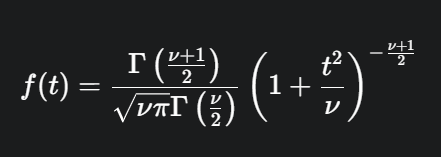

**Forma:** Es muy similar a la Campana de Gauss (Distribución Normal Estándar $N(0, 1)$), ya que también es simétrica respecto a cero y tiene forma de campana.

**Diferencia Clave ("Colas más Pesadas"):** La distribución $t$-Student tiene "colas más gordas" o "más pesadas". Esto significa que los valores extremos (raros) son un poco más probables en la distribución $t$ que en la Normal.

**Parámetro Único:** A diferencia de la Normal que usa $\mu$ y $\sigma$, la $t$-Student se define por un único parámetro que determina su forma: los grados de libertad.

## Estadísticos Asociados

Grados de Libertad

$\nu$ (nu) o $df$

Parámetro Único: Es el valor que define la forma de la curva. En la mayoría de los casos de muestreo, se calcula como el tamaño de la muestra menos uno ($\nu = n - 1$).

Media

$\mu$

0 (Cero): Al igual que la Normal Estándar, su media es cero.

Varianza

$\sigma^2$

Mayor que 1: Su varianza es $\frac{\nu}{\nu - 2}$ (siempre mayor a 1, lo que explica las "colas más pesadas").

## Usos de la Distribución

La distribución $t$ fue desarrollada por William Sealy Gosset ("Student") para corregir los problemas de usar la Normal Estándar en las pruebas de calidad de la cerveza con pocas muestras.

> Pruebas fiables con pocas muestras para determinar la calidad de la cerveza en Guinness, como no tenia permiso de publicar sus resultados usaba el seudonimo "Student" (estudiante).

**Prueba $t$ (T-Test)**

Es la base para comparar las medias de dos grupos pequeños de datos (por ejemplo, si un nuevo fertilizante realmente hace que las plantas crezcan más alto que el antiguo).

**Intervalos de Confianza**

Se usa para calcular un rango de valores donde es probable que se encuentre la verdadera media de una población, especialmente si la muestra es pequeña y la desviación estándar de la población es desconocida.

**Incertidumbre de la Estimación**

Es la herramienta correcta cuando no conocemos el verdadero valor de la desviación estándar poblacional ($\sigma$) y tenemos que estimarlo usando la desviación estándar de la muestra ($s$). La distribución $t$ compensa esta incertidumbre con sus colas más anchas.

# 🧪 Ejercicio de ejemplo: Distribución T-Student

## El Misterio de las Galletas

Escenario: Una famosa marca de galletas, "ChocoChispas," afirma que cada uno de sus paquetes contiene, en promedio, 40 chispas de chocolate. Sin embargo, un grupo de estudiantes de estadística sospecha que la cantidad real es menor. Para investigarlo, compran una muestra de 15 paquetes de galletas y cuentan meticulosamente las chispas en cada uno.

El objetivo es utilizar una prueba t de Student para determinar si la evidencia de la muestra apoya la sospecha de los estudiantes de que el número promedio de chispas es, en realidad, inferior a 40.

Hipótesis:

Hipótesis Nula $H_0$: El promedio de chispas de chocolate por paquete es 40. ($\mu$ = 40)
Hipótesis Alternativa $H_1$: El promedio de chispas de chocolate por paquete es menor que 40. ($\mu$ < 40)


In [1]:
# Importar las bibliotecas
import numpy as np
from scipy import stats

In [2]:
# Registrar datos

# Datos de la muestra: chispas de chocolate contadas en 15 paquetes
chispas_por_paquete = [38, 35, 42, 39, 37, 41, 36, 38, 34, 39, 43, 37, 36, 38, 39]

# Convertir la lista a un array de Numpy
muestra = np.array(chispas_por_paquete)

# Imprimir datos para revisar
print("Datos de la muestra (chispas por paquete):")
print(muestra)
print(f"Número de paquetes en la muestra (n): {len(muestra)}")

Datos de la muestra (chispas por paquete):
[38 35 42 39 37 41 36 38 34 39 43 37 36 38 39]
Número de paquetes en la muestra (n): 15


In [3]:
# Calcular el promedio (media) y la desviación estándar de la muestra
media_muestral = np.mean(muestra)
desviacion_estandar_muestral = np.std(muestra, ddof=1) # Usamos ddof=1 para la desviación estándar muestral

print(f"Promedio de la muestra (x̄): {media_muestral:.2f}")
print(f"Desviación Estándar de la muestra (s): {desviacion_estandar_muestral:.2f}")


Promedio de la muestra (x̄): 38.13
Desviación Estándar de la muestra (s): 2.50


## Realizar la Prueba t de Student

Usando la función ttest_1samp de SciPy para comparar el promedio de la muestra con el promedio poblacional que estamos probando (el valor de la hipotesis nula $\mu$ = 40 )

In [4]:
# Valor de la hipótesis nula (el promedio que afirma la empresa)
mu_0 = 40

# Nivel de significancia (alfa), comúnmente 0.05
alfa = 0.05

# Realizar la prueba t de Student para una muestra
t_statistic, p_value = stats.ttest_1samp(
    a=muestra,
    popmean=mu_0,
    alternative='less'  # Hipótesis alternativa: la media es MENOR que popmean
)

print(f"Estadístico t calculado: {t_statistic:.4f}")
print(f"Valor p (p-value): {p_value:.4f}")

Estadístico t calculado: -2.8880
Valor p (p-value): 0.0060


##  Interpretación de los Resultados y Conclusión

El resultado de la prueba nos da dos valores importantes: el estadístico t y el valor p. La regla de decisión es:

Si el valor p es menor o igual que nuestro nivel de significancia (α), rechazamos la hipótesis nula.

Si el valor p es mayor que nuestro nivel de significancia (α), no tenemos evidencia suficiente para rechazar la hipótesis nula.



In [6]:
# Comparar el valor p con el nivel de significancia (alfa)
print(f"Nivel de significancia (α): {alfa}")
print(f"Valor p calculado: {p_value:.4f}")

if p_value <= alfa:
    print("\nConclusión: ¡Rechazamos la Hipótesis Nula!")
    print("La evidencia sugiere que el número promedio de chispas de chocolate por paquete es significativamente menor que 40.")
else:
    print("\nConclusión: No podemos rechazar la Hipótesis Nula.")
    print("No hay evidencia estadística suficiente para afirmar que el promedio de chispas sea menor que 40.")

Nivel de significancia (α): 0.05
Valor p calculado: 0.0060

Conclusión: ¡Rechazamos la Hipótesis Nula!
La evidencia sugiere que el número promedio de chispas de chocolate por paquete es significativamente menor que 40.
